### Árbol de regresión

Un árbol de regresión es una estructura de modelo de aprendizaje automático utilizada para predecir valores continuos. A diferencia de un árbol de clasificación, que asigna categorías discretas, el árbol de regresión estima un valor numérico basándose en las características de entrada.

Modelos que van generado cortes en las variables candidatas para crear subpoblaciones (nodos hijos) con valores similares en la variable dependiente, utilizando alguna métrica de reducción del error para determinar el orden en el que las variables entran en el modelo (el orden en el que se realizan los cortes). Es posible que entre la misma variable en el modelo más de una vez en distintas ramas o niveles de profundidad.

A todas las observaciobes que acaban en el mismo modo terminal u hoja se les asigna el mismo valor estimado: la media de la variable dependiente de las observacones que caía en ese nodo final.

Ventajas:
* Interacción entre variables
* Fácil de entender e interpretar
* Algunas implementaciones permiten trabajar directamente con variables categóricas.
* Algunas implementaciones permtien trabajar con missings

Restricciones: 
* Pequeños cambios en la muestra pueden producir árboles muy diferentes (inestable)
* Sobreajuste a la muestra de desarrollo si no se controla la profundidad
* Sesgo cuando hay variables categóricas con muchas categorías.

Parámteros: 
* max_depth: Profunidad máxima
* min_sample: mínimo tamaño de un nodo para partirlo
* min_samples_leaf: mínimo tamaño en una nueva hoja/partición

#### Importar paquetes

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

#### Cargar datos

In [113]:
casas = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/CUA Big Data/HOUSING (1).CSV")
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [114]:
# Ponemos la última columna como índices.

casas.set_index("Address",inplace=True)
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Address,,,,,,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


#### Descripción y Visualización de datos

In [116]:
# Nombres variables 

casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [117]:
#Descripción de las variables

casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

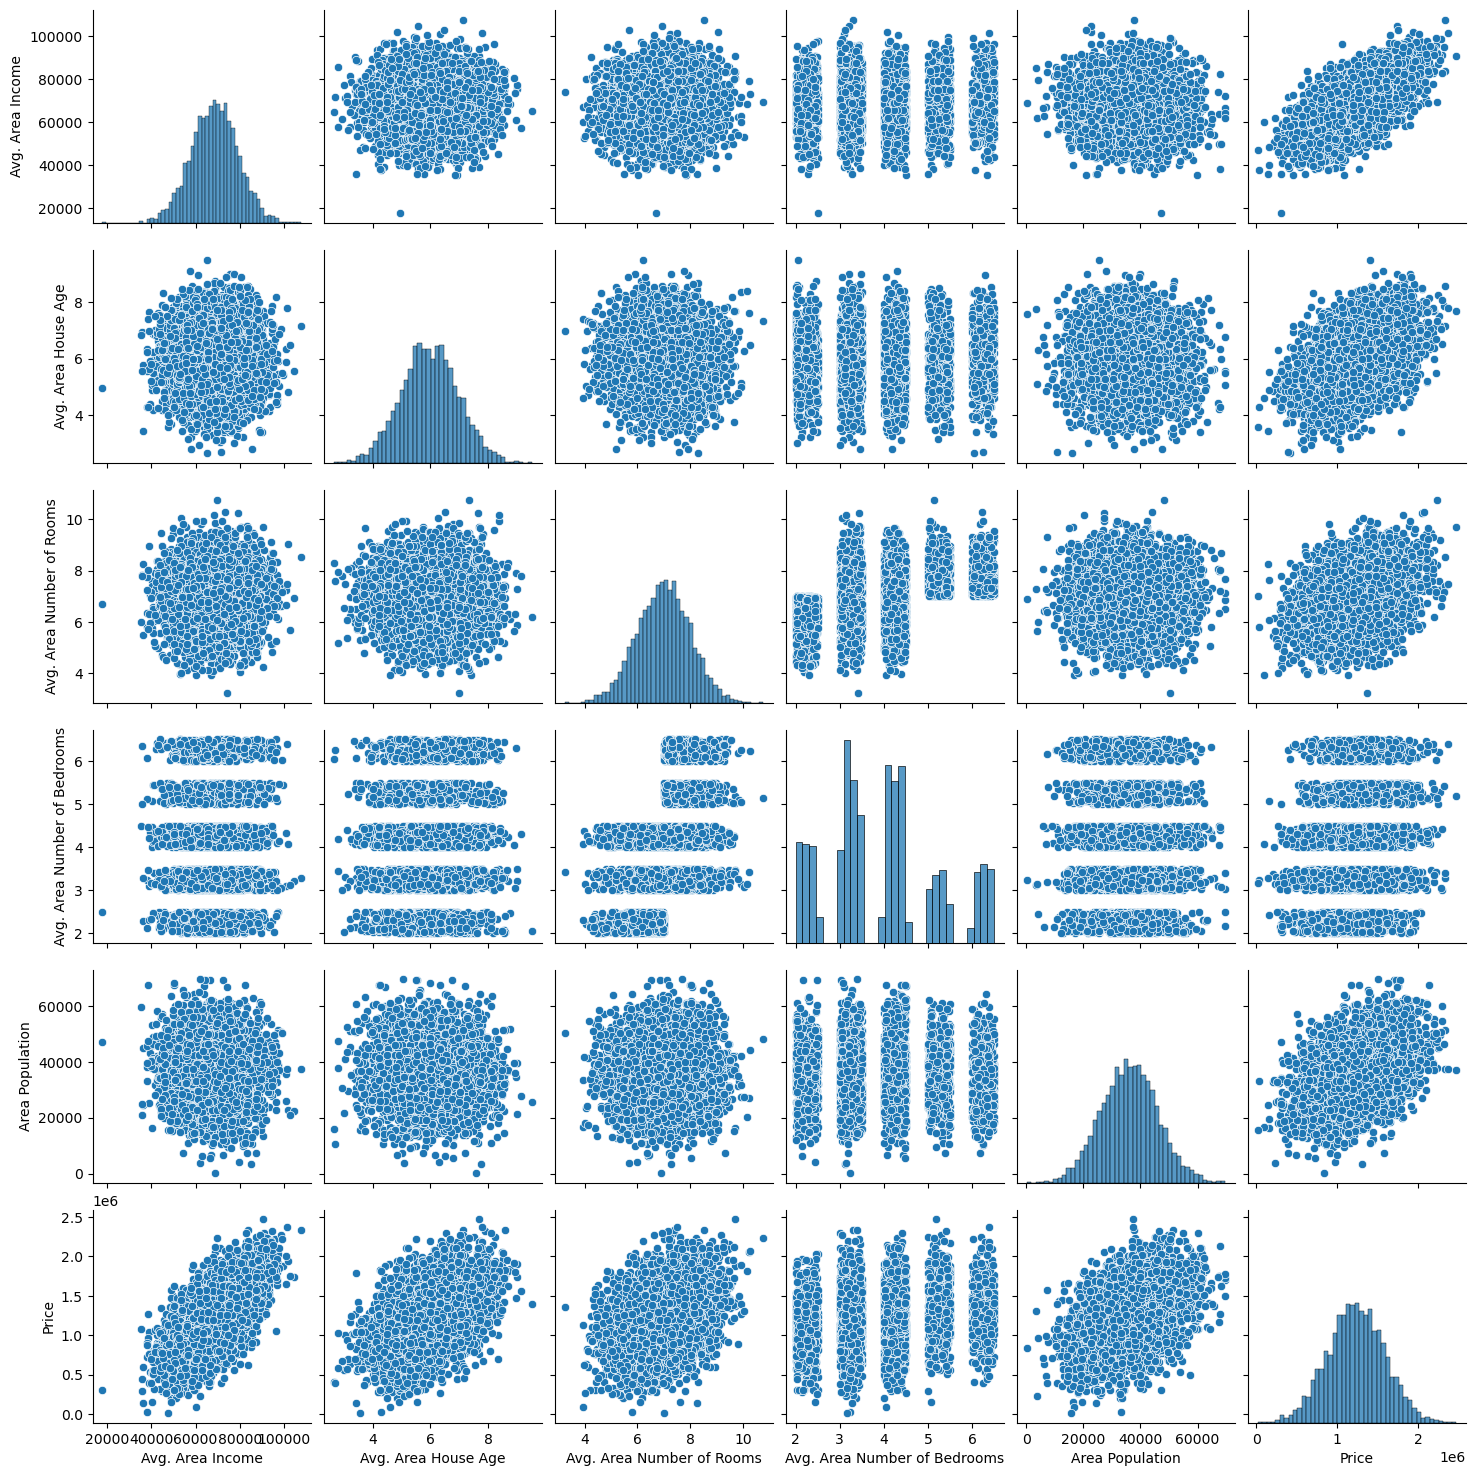

In [118]:
# Gráfico bivariante de las variables

sns.pairplot(casas)
plt.show()

C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


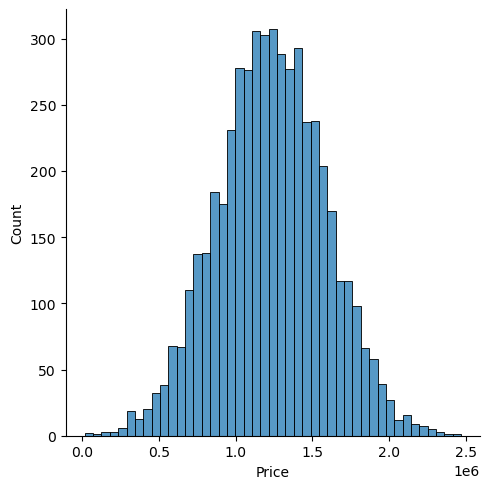

In [119]:
# Disttribución de la variable Price

sns.displot(casas["Price"])
plt.show()

In [120]:
# Correlación de las variables, para ver como correlaciónan con price

casas.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

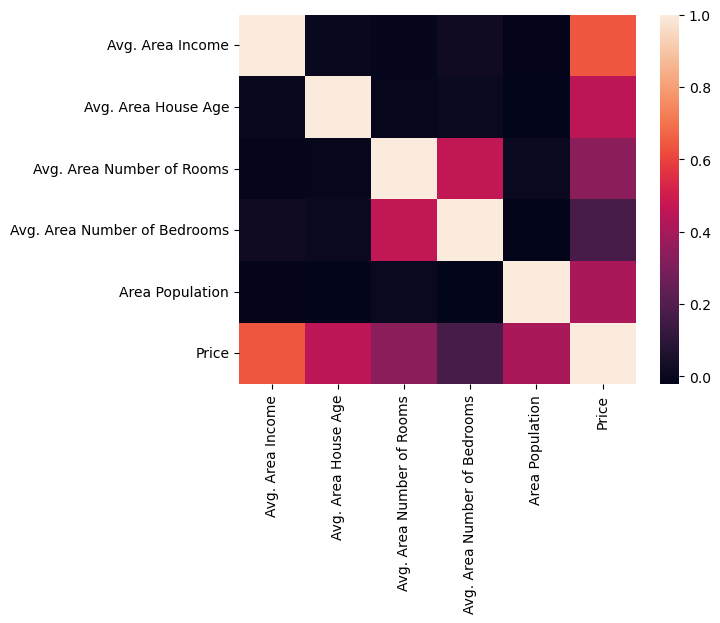

In [121]:
# Mapa de calor de las correlaciones 

sns.heatmap(casas.corr())

#### Estimación del árbol de regressión

En primer lugar, es necesario separar las variables independientes <b>X</b> de la variable dependiente <b>y</b>

In [123]:
X = casas.drop(columns=["Price"])

y = casas["Price"]

Además, vamos a separar la muestra en un 70% para estimar el modelo y un 30% para evaluarlo.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.3, random_state=123456789)

In [126]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

#### Visualización del árbol de regresión

La forma del árbol no es una ecuación o fórmula matemática al uso, como el caso de la regresión lienal, sino una serie de sentebcas lógicas condicionales. 

Por este motivo, especialmente cuando se trata de un árbol de cierta profundidad, es conveniente visualizarlo para entender mejor su estructura.

[Text(0.5, 0.9, 'Avg. Area Income <= 71249.484\nsquared_error = 120172410677.851\nsamples = 3500\nvalue = 1228049.958'),
 Text(0.25, 0.7, 'Avg. Area House Age <= 5.832\nsquared_error = 92123844763.386\nsamples = 2088\nvalue = 1084980.059'),
 Text(0.125, 0.5, 'Area Population <= 33887.744\nsquared_error = 71012168783.535\nsamples = 958\nvalue = 934866.473'),
 Text(0.0625, 0.3, 'Avg. Area Income <= 55786.725\nsquared_error = 53844092835.783\nsamples = 395\nvalue = 794985.908'),
 Text(0.03125, 0.1, 'squared_error = 33733193792.409\nsamples = 74\nvalue = 559928.542'),
 Text(0.09375, 0.1, 'squared_error = 42806732494.709\nsamples = 321\nvalue = 849173.587'),
 Text(0.1875, 0.3, 'Avg. Area Income <= 57156.492\nsquared_error = 59697925997.316\nsamples = 563\nvalue = 1033006.48'),
 Text(0.15625, 0.1, 'squared_error = 44349429721.059\nsamples = 138\nvalue = 818178.195'),
 Text(0.21875, 0.1, 'squared_error = 44830208907.937\nsamples = 425\nvalue = 1102762.488'),
 Text(0.375, 0.5, 'Area Population

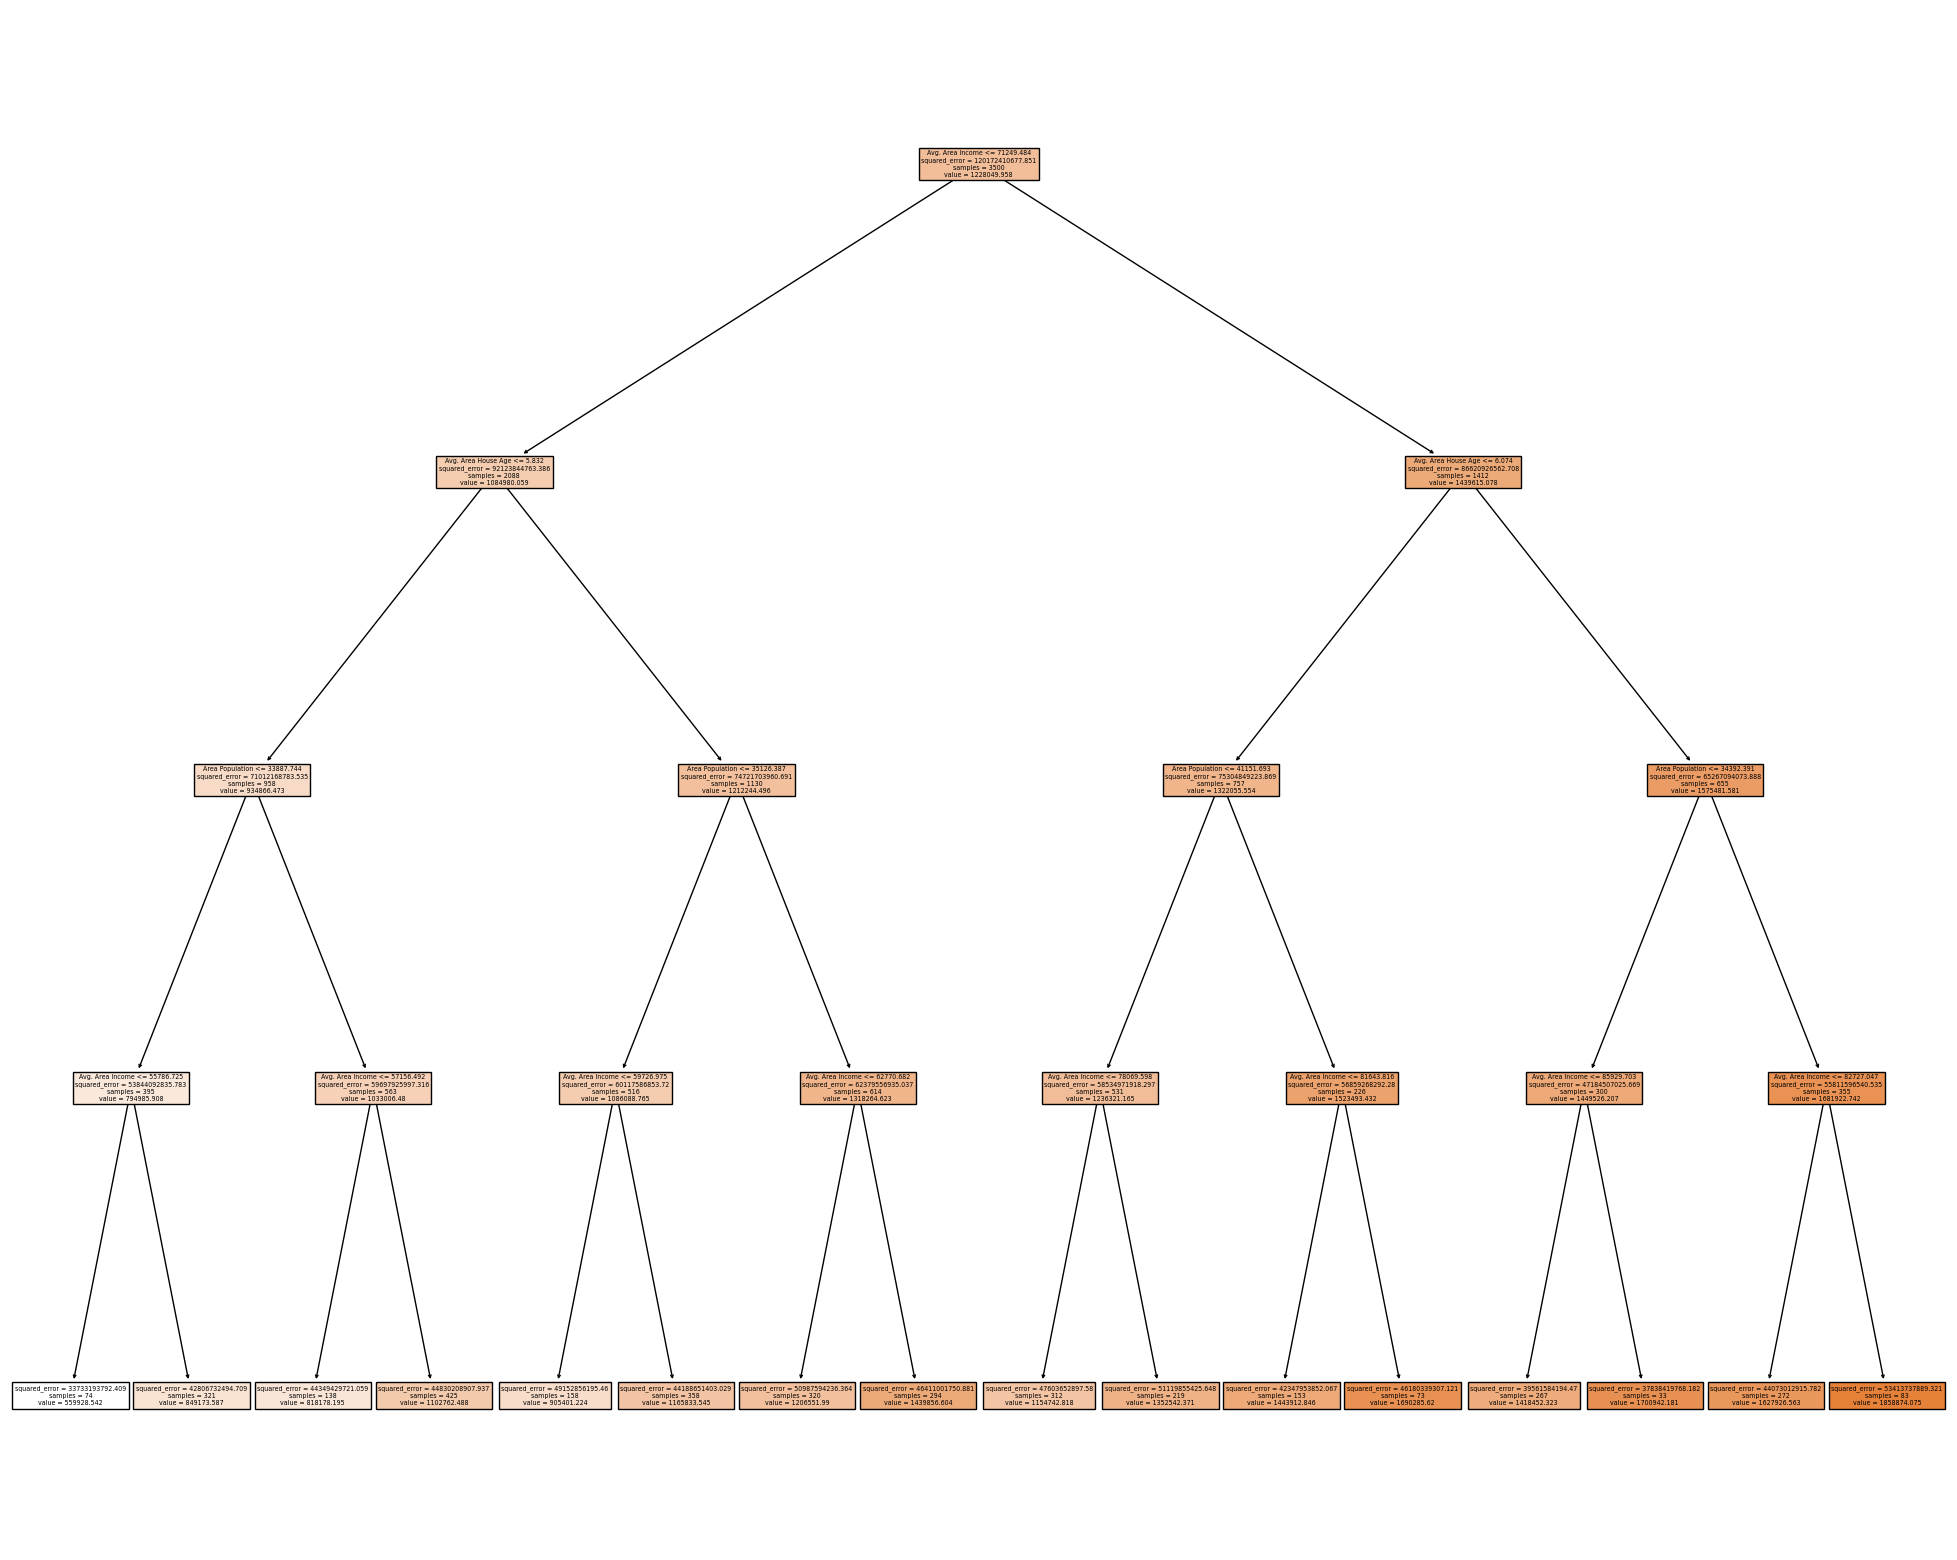

In [128]:
fig = plt.figure(figsize=(25,20))

tree.plot_tree(reg_tree, feature_names = ["Avg. Area Income","Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"],
              filled = True)

Una vez se visualiza el árbol, es fácil entender que, para una nueva observación, se evaluaría en cada nodo la condición lógica y se avanzaría por una rama u otra hasta llegar a un nodo terminal, donde se asigna el valor que se observa para esa supoblación en la muestra de desarrollo ( es decir, la media observada en esa muestra). También se osberva el error cuadrático medio en cada nodo.

#### Inferencia con el árbol de regresión 

En primer lugar hay que puntuar la muestra test con el modelo estimado

In [131]:
predicciones = reg_tree.predict(X_test)
predicciones

array([1102762.48758918, 1439856.60439454, 1206551.98990845, ...,
        849173.58684154, 1102762.48758918, 1165833.54509282])

#### Evaluación de los modelos

Construimos un scatterplot para comparar los valores estimados y observados en ambos modelo.

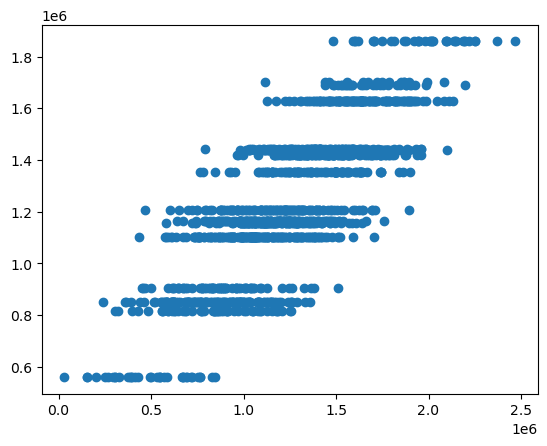

In [133]:
plt.scatter(y_test, predicciones)
plt.show()

Cada "fila" de puntos corresponde con uno de los nodos terminales del árbol (con su estimación), donde se observa cierta dispersión de los valores observados en y_test. 

Construimos también un histograma de los residuos para ver si son similares a una distribución normal.

C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


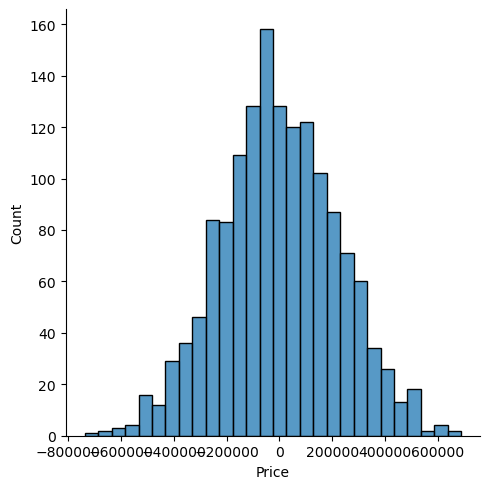

In [135]:
sns.displot((y_test-predicciones))

Efectivamente, los residuos presentan una distribución normal alrededor de 0. Por último, calculamos el coeficiente <b>R^2</b> (porcentaje de la varianza de la variable indeoendiente explicada por el modelo):

In [137]:
metrics.r2_score(y_test,predicciones)

0.637980247507294

El arbol de regresión tiene un <b>R^2 = 0,638</b>, por lo que eplixa un 64% de <b>y</b>. 

#### Entendiendo mejro el árbol de regresión

Se trata de un modelo que sobreajusta mucho si no se controla la profunidad del árbol. Esto se puede osbervar calculando el poder discriminante en la muestra de desarrollo, y viendo que presenta una caída significativa en la muestra de validación. Además, nos hemos quedado "cortos" en la profunidad, puesto que el modelo de regresión múltiple ajustaba mejor.

El modelo ideal tendría que balancear el sesgo y la varianza.

In [140]:
metrics.r2_score(y_train,reg_tree.predict(X_train))

0.621763359697109

En este caso, de hecho, el <b>R^2</b> es más alto en test que en train.

Construimos un modelo con profunidadi 8.

In [142]:
reg_tree_8 = DecisionTreeRegressor(max_depth=8)
reg_tree_8.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

[Text(0.501026218220339, 0.9444444444444444, 'Avg. Area Income <= 71249.484\nsquared_error = 120172410677.851\nsamples = 3500\nvalue = 1228049.958'),
 Text(0.24993379237288135, 0.8333333333333334, 'Avg. Area House Age <= 5.832\nsquared_error = 92123844763.386\nsamples = 2088\nvalue = 1084980.059'),
 Text(0.12182203389830508, 0.7222222222222222, 'Area Population <= 33887.744\nsquared_error = 71012168783.535\nsamples = 958\nvalue = 934866.473'),
 Text(0.05905720338983051, 0.6111111111111112, 'Avg. Area Income <= 55786.725\nsquared_error = 53844092835.783\nsamples = 395\nvalue = 794985.908'),
 Text(0.02913135593220339, 0.5, 'Avg. Area Number of Rooms <= 6.372\nsquared_error = 33733193792.409\nsamples = 74\nvalue = 559928.542'),
 Text(0.01694915254237288, 0.3888888888888889, 'Avg. Area House Age <= 5.003\nsquared_error = 15009356459.539\nsamples = 20\nvalue = 422780.007'),
 Text(0.00847457627118644, 0.2777777777777778, 'Avg. Area House Age <= 4.505\nsquared_error = 11910311019.414\nsamples

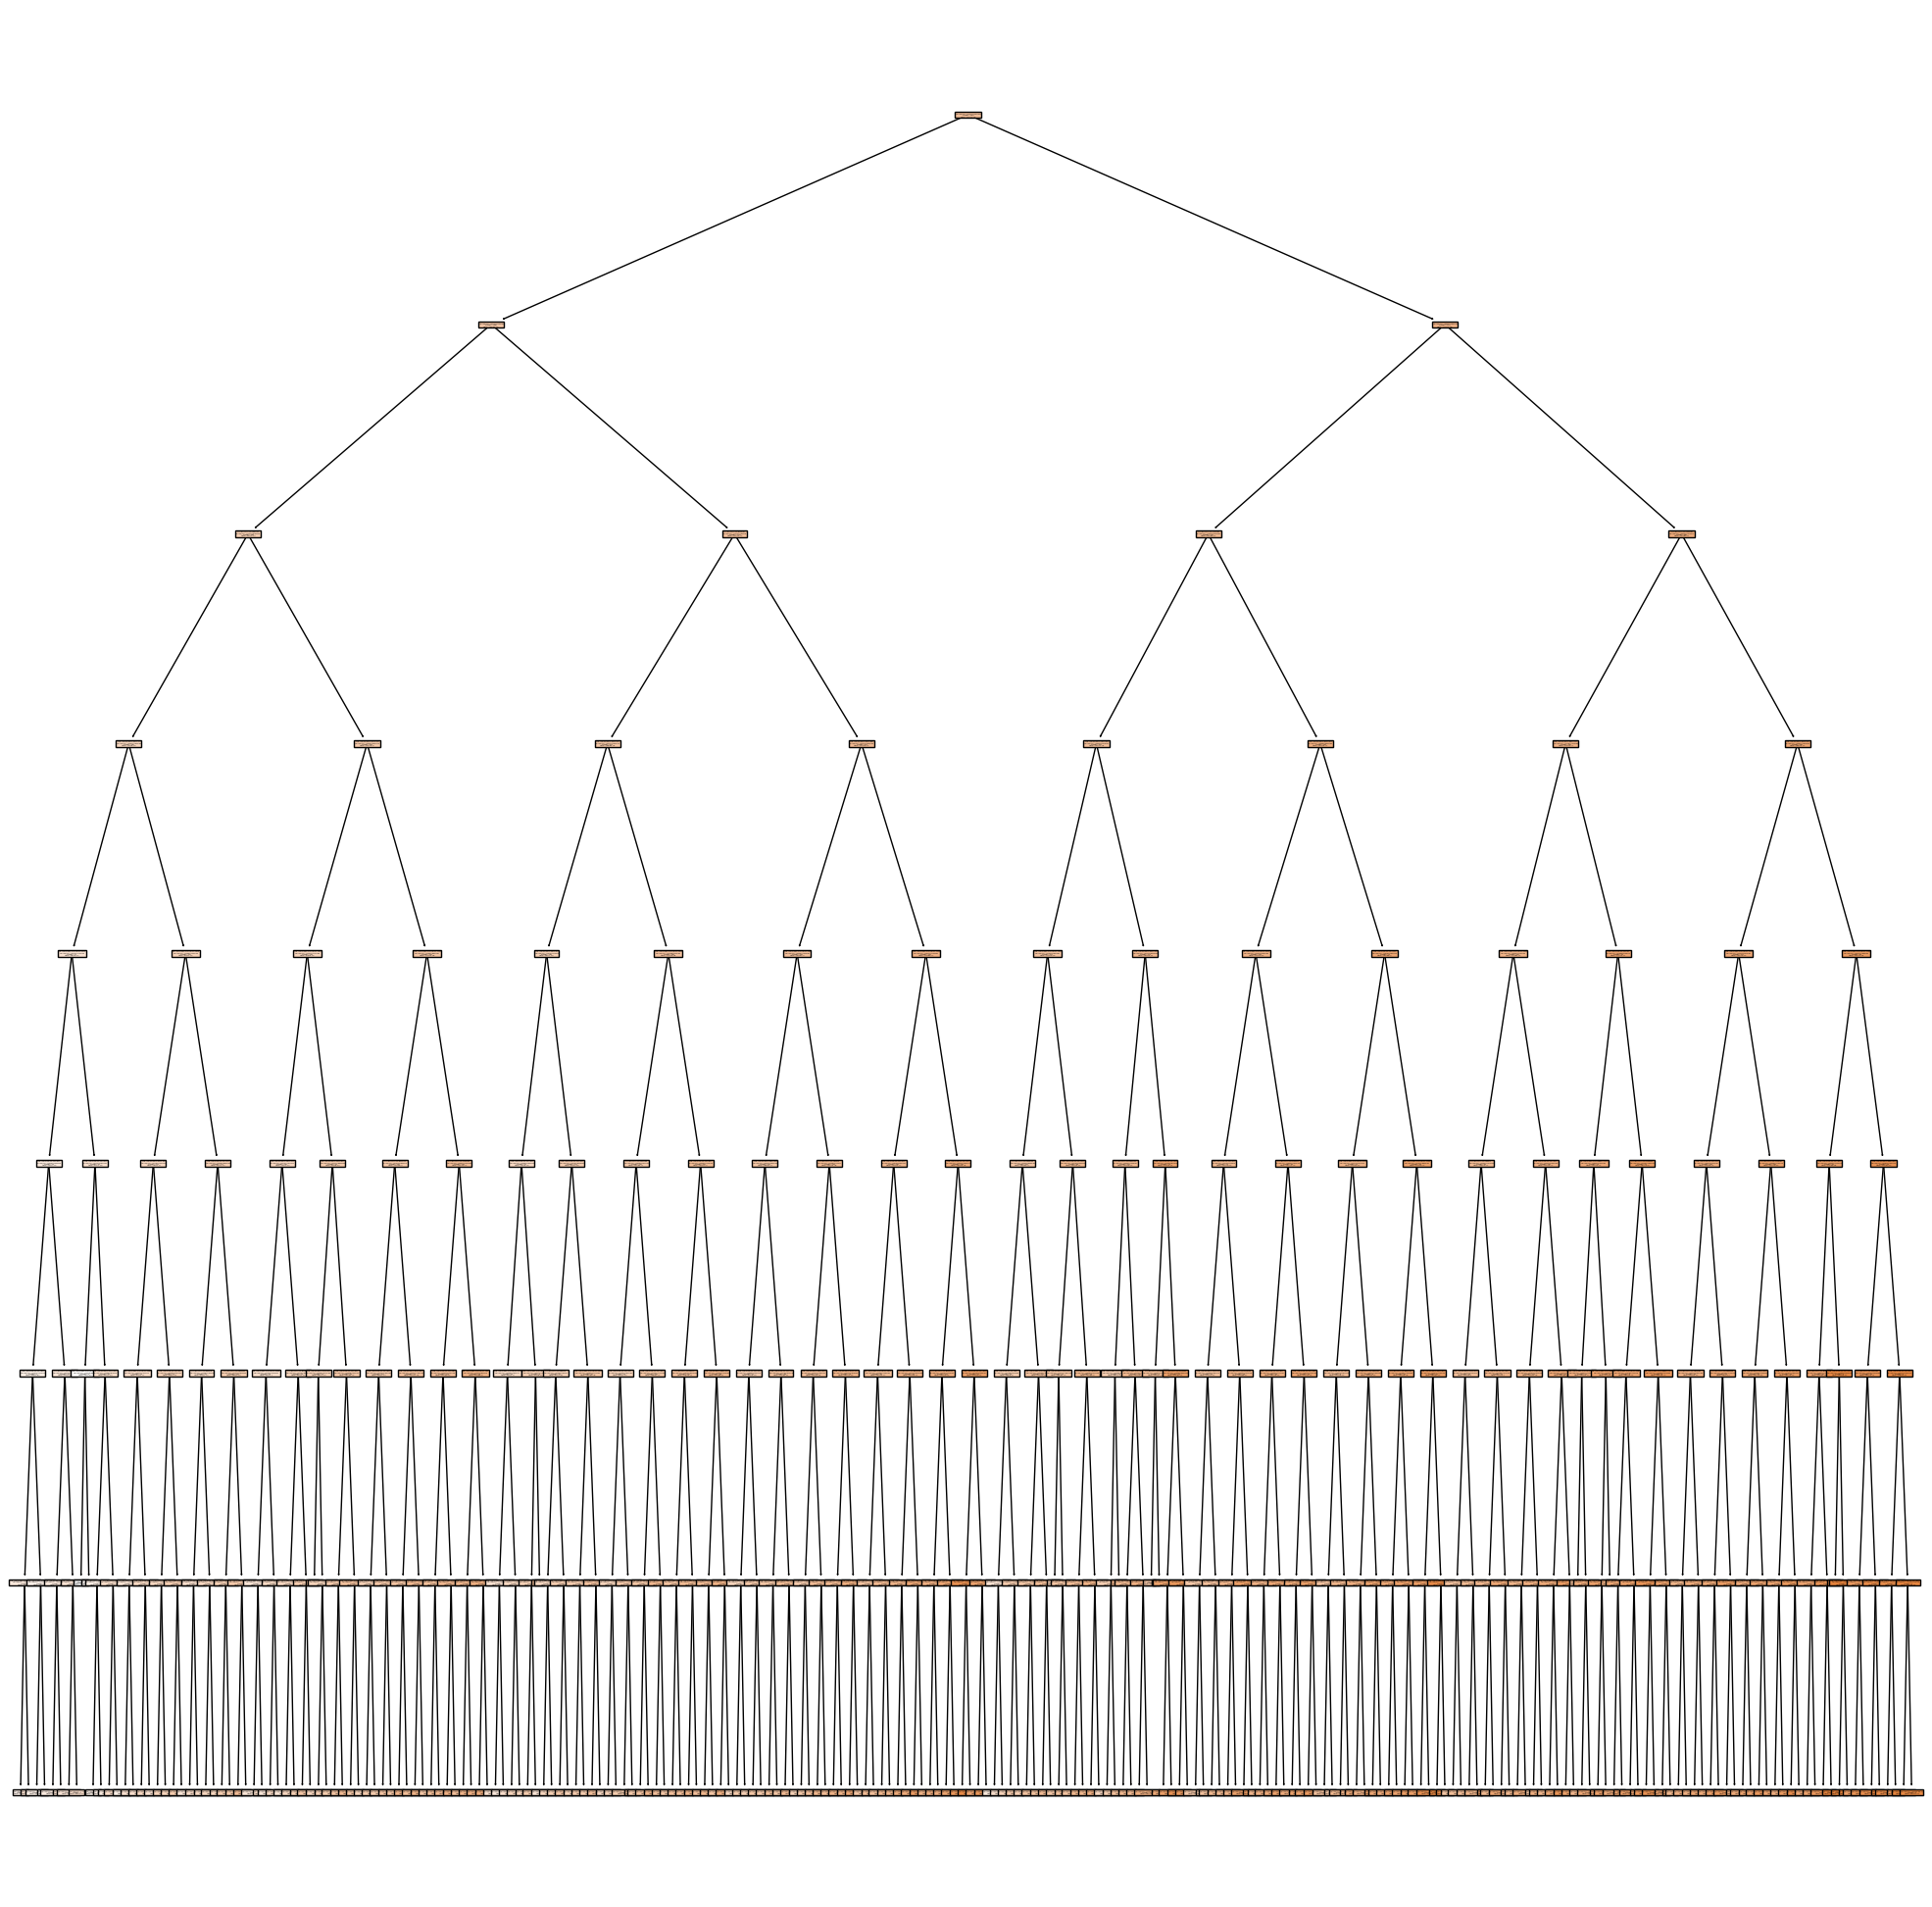

In [143]:
fig_8 =plt.figure(figsize=(25,25))

tree.plot_tree(reg_tree_8, feature_names=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
                                   'Avg. Area Number of Bedrooms','Area Population'], filled=True)

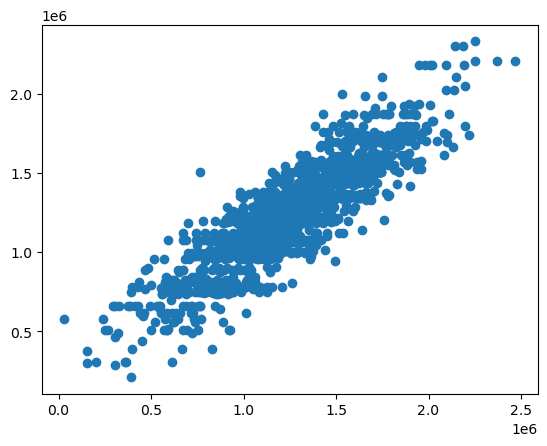

In [164]:
plt.scatter(y_test,reg_tree_8.predict(X_test))
plt.show()

Ahora si que hay nodos termibales suficientes como para que las estimaciones sean tan granulares como los datos originales.

In [171]:
metrics.r2_score(y_train,reg_tree_8.predict(X_train))

0.8817901680318218

In [173]:
metrics.r2_score(y_test,reg_tree_8.predict(X_test))

0.7867706439493709

En este caso, tenemos que <b>R^2 train =0.882</b> y <b>R^2 test =0.787</b>